In [2]:
import hoomd
import hoomd.md
import numpy
from matplotlib import pyplot
%matplotlib inline

# MD provided log quantities

The MD integrators provide additional log quantities. The potentials also provide their own energy as log quantities. To demonstrate, this example executes a lj MD simulation.

In [2]:
hoomd.context.initialize('--mode=cpu')
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sq(a=1.05), n=10)
nl = hoomd.md.nlist.cell()
lj = hoomd.md.pair.lj(r_cut=3.0, nlist=nl)
lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0)
hoomd.md.integrate.mode_standard(dt=0.005)
langevin = hoomd.md.integrate.langevin(group=hoomd.group.all(), kT=1.0, seed=2)

HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 100 particles
notice(2): integrate.langevin/bd is using specified gamma values


Log all additional MD quantities.

In [3]:
log1 = hoomd.analyze.log(filename="log-output.log",
                         quantities=['num_particles',
                                     'ndof',
                                     'translational_ndof',
                                     'rotational_ndof',
                                     'potential_energy',
                                     'kinetic_energy',
                                     'translational_kinetic_energy',
                                     'rotational_kinetic_energy',
                                     'temperature',
                                     'pressure',
                                     'pair_lj_energy'],
                         period=100,
                         overwrite=True)

In [4]:
hoomd.run(8000, quiet=True)

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 100
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no


In [5]:
langevin.set_params(kT = 2.0)

In [6]:
hoomd.run(8000, quiet=True)

## Interpreting the log output

__analyze.log__ produces a delimited text file. One way to read it is with numpy and plot columns with matplotlib.

In [7]:
!head log-output.log

timestep	num_particles	ndof	translational_ndof	rotational_ndof	potential_energy	kinetic_energy	translational_kinetic_energy	rotational_kinetic_energy	temperature	pressure	pair_lj_energy
0	100	198	198	0	-239.041189	0	0	0	0	5.811066396	-239.041189
100	100	198	198	0	-237.2840859	71.43067505	71.43067505	0	0.7215219702	6.628555754	-237.2840859
200	100	198	198	0	-223.8642016	80.31502536	80.31502536	0	0.8112628824	7.929707771	-223.8642016
300	100	198	198	0	-230.4110261	87.65619338	87.65619338	0	0.8854160948	7.599801982	-230.4110261
400	100	198	198	0	-232.4675923	94.84449382	94.84449382	0	0.9580251901	7.408248535	-232.4675923
500	100	198	198	0	-237.9413132	88.53505405	88.53505405	0	0.8942934753	7.040271015	-237.9413132
600	100	198	198	0	-228.3343192	94.96089669	94.96089669	0	0.9592009767	7.71130483	-228.3343192
700	100	198	198	0	-218.7178548	97.53789391	97.53789391	0	0.9852312516	8.450154603	-218.7178548
800	100	198	198	0	-220.6001892	110.0841928	110.0841928	0	1.111961543	8.406595412	-220.6001

In [8]:
data = numpy.genfromtxt(fname='log-output.log', skip_header=True)

**num_particles** counts the number of particles in the system. This is fixed in this example, but could vary.

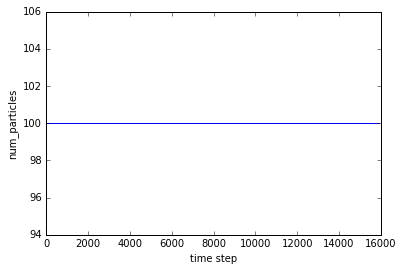

In [9]:
pyplot.plot(data[:,0], data[:,1])
pyplot.xlabel('time step')
pyplot.ylabel('num_particles')

**ndof** counts the total number of degrees of freedom that the integration methods provide, which is a sum of the translational (**translational_ndof**) and rotational (**rotational_ndof**) degrees of freedom. This example consists of lj point particles, so there are no rotational degrees of freedom.

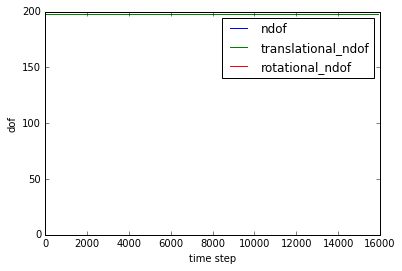

In [10]:
pyplot.plot(data[:,0], data[:,2], label='ndof')
pyplot.plot(data[:,0], data[:,3], label='translational_ndof')
pyplot.plot(data[:,0], data[:,4], label='rotational_ndof')
pyplot.xlabel('time step')
pyplot.ylabel('dof')
pyplot.legend()

**potential_energy** is the total potential energy of the system as a sum of all the individual potential energies.

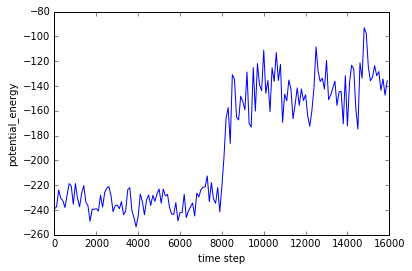

In [11]:
pyplot.plot(data[:,0], data[:,5])
pyplot.xlabel('time step')
pyplot.ylabel('potential_energy')

**kinetic_energy** is the total kinetic energy in the system, which is a sum of the per particle translational (**translational_kinetic_energy**) and rotational (**rotational_kinetic_energy**) terms. Again, this example is of point particles and there is no rotational kinetic energy.

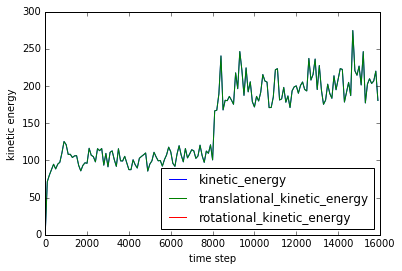

In [12]:
pyplot.plot(data[:,0], data[:,6], label='kinetic_energy')
pyplot.plot(data[:,0], data[:,7], label='translational_kinetic_energy')
pyplot.plot(data[:,0], data[:,8], label='rotational_kinetic_energy')
pyplot.xlabel('time step')
pyplot.ylabel('kinetic energy')
pyplot.legend(loc='lower right')

**temperature** is the kinetic temperature of the system in energy units. It computed from the total kinetic energy using the equipartition theorem and **ndof**.

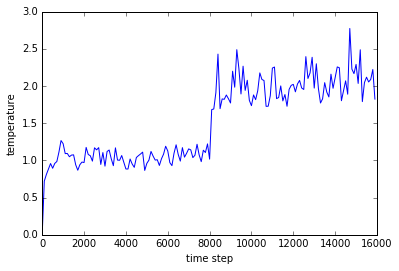

In [13]:
pyplot.plot(data[:,0], data[:,9])
pyplot.xlabel('time step')
pyplot.ylabel('temperature')

**pressure** is computed by the virials that result from the particle interactions.

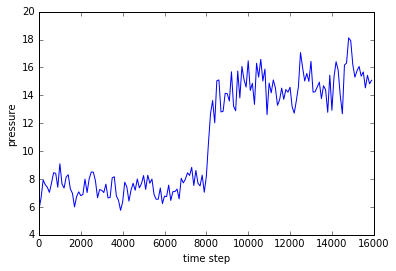

In [15]:
pyplot.plot(data[:,0], data[:,10])
pyplot.xlabel('time step')
pyplot.ylabel('pressure')

**pair_lj_energy** is the potential energy just due to the lj potential. Since lj is the only potential in this example, it is the same as the total potential energy.

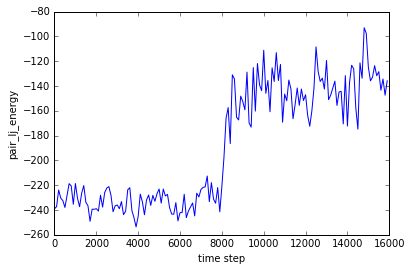

In [17]:
pyplot.plot(data[:,0], data[:,11])
pyplot.xlabel('time step')
pyplot.ylabel('pair_lj_energy')